In [20]:
import mysql.connector

In [21]:
serverName = "localhost"

cnx = mysql.connector.connect(user='michael', password='Password2017',
                              host=serverName,
                              database='stock_market')
cursor = cnx.cursor()

In [40]:
symbol = 'MSFT'

In [41]:
query = "select * from (SELECT effective_date, `close`, `adj_close` FROM `market.stock_price` WHERE symbol = '{0}' order by effective_date DESC limit 1000) sub order by effective_date ASC".format(symbol)

In [42]:
cursor.execute(query)
result = cursor.fetchall()

for row in result:
    print (row)
    break

(datetime.date(2014, 2, 6), Decimal('36.180000'), Decimal('32.648458'))


In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5,0,'$')

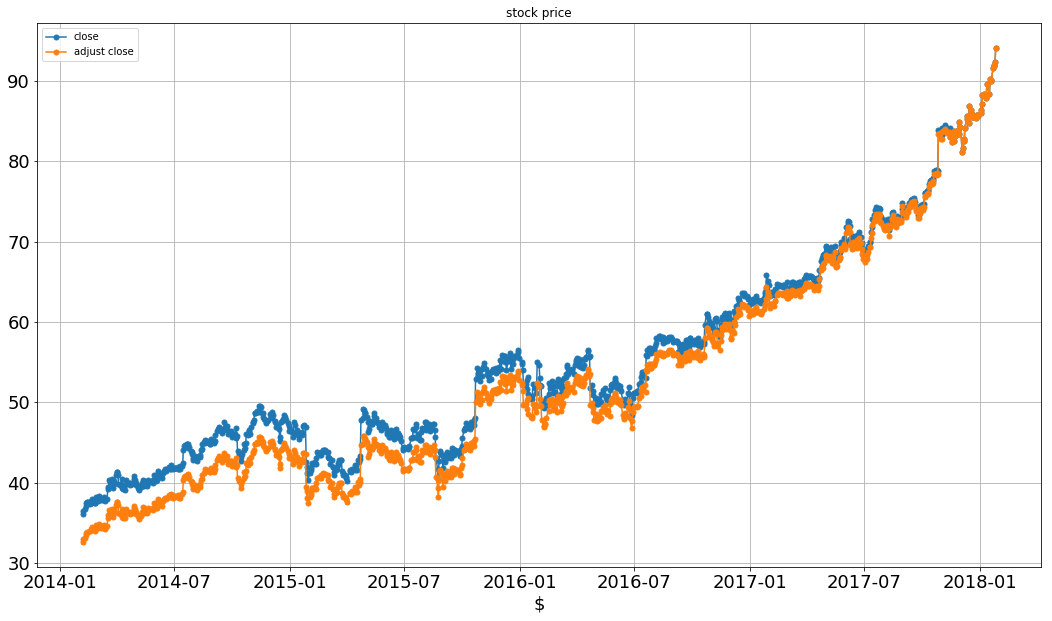

In [44]:
# push data into a dataframe
dft = pd.DataFrame(([row[1], row[2]] for row in result),
                   columns=['close', 'adjust close'], 
                   index=(row[0] for row in result),
                   dtype=np.float)
dft
# setup chart format
ax = dft[["close", "adjust close"]].plot.line(grid='true', figsize=(18,10), title='stock price', 
                                          marker=".", markersize=10, fontsize=18)
ax.set_xlabel('$', fontsize=18)



In [60]:
cursor.execute(query)
dfsql = pd.DataFrame(cursor.fetchall(), dtype=np.float)
dfsql.columns = cursor.column_names
dfsql.set_index('effective_date', inplace=True)

In [61]:
dfsql

,close,adj_close
effective_date,,
2014-02-06,36.180,32.648458
2014-02-07,36.560,32.991366
2014-02-10,36.800,33.207939
2014-02-11,37.175,33.546335
2014-02-12,37.470,33.812540
2014-02-13,37.610,33.938875
2014-02-14,37.620,33.947899
2014-02-18,37.420,34.020090
2014-02-19,37.510,34.101913


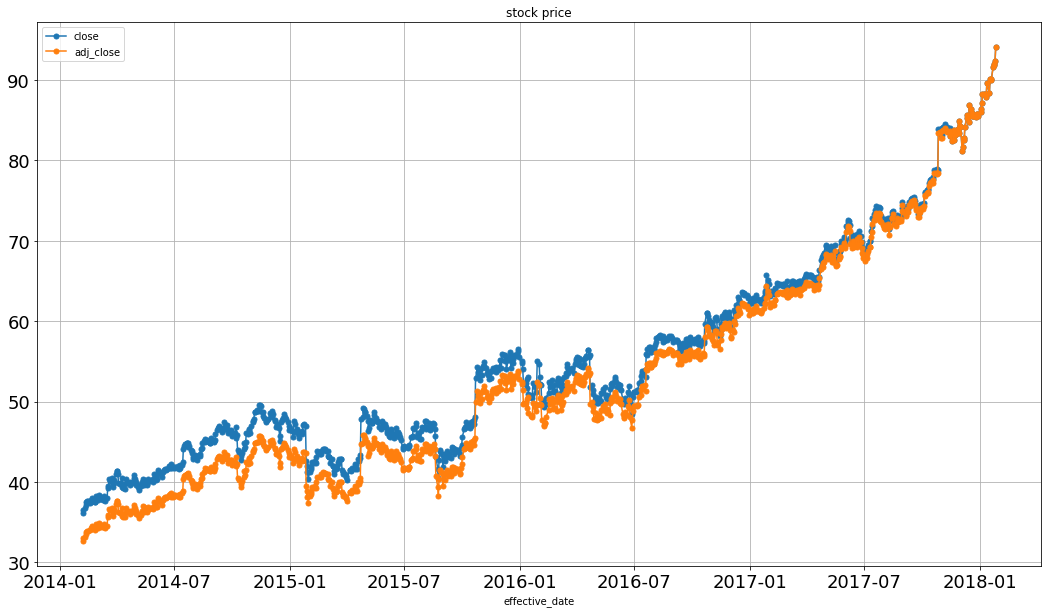

In [62]:
axsql = dfsql[["close", "adj_close"]].plot.line(grid='true', figsize=(18,10), title='stock price', 
                                          marker=".", markersize=0, fontsize=18)
